In [1]:
#다나와 url 접속

from selenium import webdriver
browser = webdriver.Chrome(r'C:\Users\Gargantua\Desktop\files\chromedriver.exe')
url = 'http://search.danawa.com/dsearch.php?k1=%EB%AC%B4%EC%84%A0%EC%B2%AD%EC%86%8C%EA%B8%B0&module=goods&act=dispMain'
browser.get(url)

In [2]:
from bs4 import BeautifulSoup

html = browser.page_source
soup = BeautifulSoup(html, 'html.parser')

In [3]:
prod_item = soup.select('li.prod_item')
len(prod_item)

47

In [4]:
prod_item = soup.select('ul.product_list > li.prod_item > div.prod_main_info')
len(prod_item)

44

In [5]:
title = prod_item[0].select('div.prod_info > p > a')[0].text.strip()
title

'치후360 S9 MAX'

In [6]:
prod_spec = prod_item[0].select('div.prod_info > dl.prod_spec_set > dd > div')[0].text.strip().replace('\n\t \t\t\t\t\t\t\t\t', "")
prod_spec

'로봇청소기 / 흡입+걸레 / [센서] LDS라이다센서 / 장애물인식센서 / 추락방지센서 / [성능] BLDC모터 / 흡입력: 2650Pa / 배터리: 리튬이온 / 용량: 5200mAh / 사용시간: 3시간20분(개당) / 헤파필터 / 소음: 54dB / 소비전력: 30W / [기능] 스마트폰제어: 간편업데이트, 금지구역, 원격예약, 원격청소 / 스마트맵핑 / 리모콘 / [부가] 먼지통용량: 0.42L / 물통용량: 0.2L / 색상: 화이트 / 무게: 3.9kg / 크기(가로x세로x깊이): 350x100x350mm'

In [7]:
price = prod_item[0].select('div.prod_pricelist > ul > li > p.price_sect > a > strong')[0].text.strip().replace(",","")
price

'484030'

In [103]:
#반복문 통해 취합하기

def get_prod_items(prod_items):
    
    prod_data = []

    for prod in prod_items:
        try:
            title = prod.select('div.prod_info > p > a')[0].text.strip()
        except:
            title = ''
    
        try:
            prod_spec = prod.select('div.prod_info > dl.prod_spec_set > dd > div')[0].text.strip().replace('\n\t \t\t\t\t\t\t\t\t', "")
        except:
            prod_spec = ''
    
        try:
            price = prod.select('div.prod_pricelist > ul > li > p.price_sect > a > strong')[0].text.strip().replace(",","")
        except:
            prod_spec = 0
            
        
        if title == '' or len(title.split(' ')) == 1:
            continue

        prod_data.append([title, prod_spec, price])
    
    return prod_data

In [104]:
prod_item = soup.select('li.prod_item')

prod_data = get_prod_items(prod_item)

print(len(prod_data))

40


In [105]:
prod_data

[['일렉트로룩스 퓨어 F9 PF91-5EBF',
  '핸디/스틱청소기 / 스틱형 / 무선형 / 흡입전용 / [배터리] 리튬이온 / 충전시간: 6시간 / 사용시간: 55분(개당) / [필터] 5단계여과 / [기능] 먼지감지센서 / 셀프스탠딩 / LED라이트 / 배터리잔량표시 / [구성품] 바닥 / 침구 / 더스팅 / 3in1 / 업탑어댑터 / 거치대 / [부가] 먼지통용량: 0.7L / 알레르기인증(BAF) / 색상: 인디고블루 / 무게: 4.1kg / 플렉스리프트 / 크기(가로x세로x깊이): 215x1200x249mm',
  '235110'],
 ['JDL tech 트위스터',
  '물걸레청소기 / 스틱+핸디형 / 왕복식 / 무선형 / 용량: 2200mAh / 충전시간: 5시간 / 사용시간: 1시간50분(개당) / [기능] 물분사 / LED라이트 / 각도조절 / 셀프스탠딩 / 배터리잔량표시 / 프리볼트 / 소비전력: 25W / [부가] 색상: 화이트 / 무게: 2.4kg / 모터과열방지 / 과충전방지 / 크기(가로x세로x깊이): 270x1160x270mm',
  '115900'],
 ['샤오미 COCLEAN 차량용 무선 청소기 가정용 충전기 220V', '차량용청소기 / 어댑터 / 가정용 충전기', '10580'],
 ['쿠쿠전자 인스퓨어 파워클론 CVC-A1420UG',
  '핸디/스틱청소기 / 핸디+스틱형 / 무선형 / 흡입전용 / [성능] 싸이클론 / BLDC모터 / 흡입력: 140AW / 흡입력: 23000Pa / 소비전력: 420W / [배터리] 분리형 / 리튬이온 / 사용시간: 35분(개당) / [필터] 헤파필터 / H13급 / 5단계여과 / [기능] 먼지감지센서 / 배터리잔량표시 / [구성품] 바닥 / 침구 / 틈새 / 거치대 / [부가] 색상: 어반그레이 / 무게: 1.82kg / 크기(가로x세로x깊이): 250x1200x230mm',
  '286000'],
 ['샤오미 VIOMI A9 V-HWVC12A',
  '핸디/스틱청소기 / 핸디+스틱형

In [94]:
#검색 URL 함수

def get_search_page_url(keyword, page):

    return 'http://search.danawa.com/dsearch.php?query={}&volumeType=allvs&page={}&limit=40&sort=saveDESC&list=list&boost=true&addDelivery=N&recommendedSort=Y&defaultUICategoryCode=103740&defaultPhysicsCategoryCode=72%7C80%7C81%7C0&defaultVmTab=2494&defaultVaTab=156954&tab=goods'.format(keyword, page)

In [29]:
keyword = '무선청소기'
page = 1
url = get_search_page_url(keyword, page)
print(url)

http://search.danawa.com/dsearch.php?query=무선청소기&volumeType=allvs&page=1&limit=40&sort=saveDESC&list=list&boost=true&addDelivery=N&recommendedSort=Y&defaultUICategoryCode=103740&defaultPhysicsCategoryCode=72%7C80%7C81%7C0&defaultVmTab=2494&defaultVaTab=156954&tab=goods


In [31]:
#주피터 노트북 진행표시줄 처리

In [32]:
!pip install tqdm

distributed 1.21.8 requires msgpack, which is not installed.
You are using pip version 10.0.1, however version 21.1.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [33]:
import time
from tqdm import tqdm_notebook

total_page = 10
for page in tqdm_notebook(range(1, total_page + 1)):
    time.sleep(5)

C:\Users\Gargantua\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """


  0%|          | 0/10 [00:00<?, ?it/s]

In [106]:
#크롤링

from selenium import webdriver
import time
from bs4 import BeautifulSoup
from tqdm import tqdm_notebook

browser = webdriver.Chrome(r'C:\Users\Gargantua\Desktop\files\chromedriver.exe')
browser.implicitly_wait(3)

keyword = '무선청소기'
total_page = 10

prod_data_total = []

for page in tqdm_notebook(range(1, total_page + 1)):
    url = get_search_page_url(keyword, page)
    browser.get(url)
    time.sleep(5)
    
    html = browser.page_source
    soup = BeautifulSoup(html, 'html.parser')
    
    prod_items = soup.select('ul.product_list > li.prod_item > div.prod_main_info')
    prod_item_list = get_prod_items(prod_items)
    
    prod_data_total = prod_data_total + prod_item_list

    

C:\Users\Gargantua\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  app.launch_new_instance()


  0%|          | 0/10 [00:00<?, ?it/s]

In [107]:
#수집데이터 저장

import pandas as pd
data = pd.DataFrame(prod_data_total)
data.columns = ['상품명', '스펙 목록', '가격']
data.to_excel(r'C:\Users\Gargantua\Desktop\files\Codeless\1_danawa_crawling_result.xlsx', index = False)

In [48]:
#데이터전처리

In [108]:
import pandas as pd
data = pd.read_excel(r'C:\Users\Gargantua\Desktop\files\Codeless\1_danawa_crawling_result.xlsx')
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403 entries, 0 to 402
Data columns (total 3 columns):
상품명      403 non-null object
스펙 목록    403 non-null object
가격       403 non-null int64
dtypes: int64(1), object(2)
memory usage: 9.5+ KB


,상품명,스펙 목록,가격
0,치후360 S9 MAX,로봇청소기 / 흡입+걸레 / [센서] LDS라이다센서 / 장애물인식센서 / 추락방지...,499000
1,로보락 S5 Max,로봇청소기 / 흡입+걸레 / [센서] LDS라이다센서 / 추락방지센서 / 범핑센서 ...,558000
2,라이프로 RX10,로봇청소기 / 흡입+걸레 / [센서] LDS라이다센서 / 추락방지센서 / 범핑센서 ...,339000
3,LG전자 오브제컬렉션 코드제로 ThinQ A9S AO9571,핸디/스틱청소기 / 핸디+스틱형 / 무선형 / 흡입+걸레겸용 / [성능] 2중터보싸...,1193340
4,샤오미 CLEANFLY 차량용 무선 청소기 3세대 (해외구매),"차량용청소기 / 무선 / 흡입력: 16,800Pa / 최대출력: 120W / 헤파필...",51450


In [100]:
#상품명 전처리 : 모델과 제조사 구분

data['상품명'][:10]

0                             라이프로 RX10
1                          치후360 S9 MAX
2                            로보락 S5 Max
3     LG전자 오브제컬렉션 코드제로 ThinQ A9S AO9571
4    샤오미 CLEANFLY 차량용 무선 청소기 3세대 (해외구매)
5                            O0F8gsvMeX
6          샤오미 미지아 차량용 핸디 무선 청소기 (해외구매)
7                 삼성전자 제트 VS20T9278S3CS
8                   LG전자 코드제로 A9 A9100S
9                           샤오미 드리미 V10
Name: 상품명, dtype: object

In [101]:
title = '치후360 S9 MAX'
info = title.split(' ', 1)
print(info)

['치후360', 'S9 MAX']


In [109]:
company_list = []
product_list = []

for title in data['상품명']:
    tmp = title.split(' ', 1)
    company_list.append(tmp[0])
    product_list.append(tmp[1])

In [10]:
print(len(data))
print(len(company_list))
print(len(product_list))

430
430
430


In [11]:
print(company_list[:10])
print(product_list[:10])

['치후360', '로보락', '라이프로', 'LG전자', '샤오미', '삼성전자', '샤오미', 'LG전자', '샤오미', '삼성전자']
['S9 MAX', 'S5 Max', 'RX10', '오브제컬렉션 코드제로 ThinQ A9S AO9571', 'CLEANFLY 차량용 무선 청소기 3세대 (해외구매)', '제트 VS20T9278S3CS', '미지아 차량용 핸디 무선 청소기 (해외구매)', '코드제로 A9 A9100S', '드리미 V10', '비스포크 제트 VS20A956A3']


In [12]:
#스펙 목록 구분

data['스펙 목록'][:10]

0    로봇청소기 / 흡입+걸레 / [센서] LDS라이다센서 / 장애물인식센서 / 추락방지...
1    로봇청소기 / 흡입+걸레 / [센서] LDS라이다센서 / 추락방지센서 / 범핑센서 ...
2    로봇청소기 / 흡입+걸레 / [센서] LDS라이다센서 / 추락방지센서 / 범핑센서 ...
3    핸디/스틱청소기 / 핸디+스틱형 / 무선형 / 흡입+걸레겸용 / [성능] 2중터보싸...
4    차량용청소기 / 무선 / 흡입력: 16,800Pa / 최대출력: 120W / 헤파필...
5    핸디/스틱청소기 / 핸디+스틱형 / 무선형 / 흡입+걸레겸용 / [성능] 싸이클론 ...
6    차량용청소기 / 무선 / 흡입력: 13,000Pa / 최대출력: 120W / 헤파필...
7    핸디/스틱청소기 / 핸디+스틱형 / 무선형 / 흡입+걸레겸용 / [성능] 2중터보싸...
8    핸디/스틱청소기 / 핸디+스틱형 / 무선형 / 흡입전용 / [성능] 멀티싸이클론 /...
9    핸디/스틱청소기 / 핸디+스틱형 / 무선형 / 흡입+걸레겸용 / [성능] 제트싸이클...
Name: 스펙 목록, dtype: object

In [30]:
print(data['스펙 목록'][1].split('/'))

['로봇청소기 ', ' 흡입+걸레 ', ' [센서] LDS라이다센서 ', ' 추락방지센서 ', ' 범핑센서 ', ' [성능] 흡입력: 2000Pa ', ' 용량: 5200mAh ', ' 충전시간: 6시간 ', ' 사용시간: 2시간30분(개당) ', ' 소음: 53dB ', ' 소비전력: 58W ', ' [기능] 스마트폰제어: 금지구역, 원격예약, 원격청소 ', ' 스마트맵핑 ', ' 바닥감지 ', ' 자기위치메모리 ', ' 문턱등반 ', ' 자동충전 ', ' 음성안내 ', ' [부가] 먼지통용량: 0.46L ', ' 물통용량: 0.29L ', ' 색상: 화이트 ', ' 무게: 3.5kg ', ' 크기(가로x세로x깊이): 350x96.5x350mm']


In [15]:
##카테고리

spec_list = data['스펙 목록'][0].split('/')

category = spec_list[0]
print(category)

로봇청소기 


In [20]:
##사용시간 / 흡입력

for spec in spec_list:
    if '사용시간' in spec:
        use_time_spec = spec.strip()
    elif '흡입력' in spec:
        suction_spec = spec.strip()

print(use_time_spec)
print(suction_spec)

사용시간: 3시간20분(개당)
흡입력: 2650Pa


In [22]:
use_time_value = use_time_spec.split(' ')[1]
suction_value = suction_spec.split(' ')[1]

print(use_time_value)
print(suction_value)

3시간20분(개당)
2650Pa


In [110]:
category_list = []
use_time_list = []
suction_list = []


for spec in data['스펙 목록']:
    spec_list = spec.split(' / ')
    
    category = spec_list[0].strip()
    
    for value in spec_list:
        if '사용시간' in value:
            use_time = value.strip()
            use_time_value = use_time.split(' ')[-1]
        elif '흡입력' in value:
            suction = value.strip()
            suction_value = suction.split(' ')[-1]
    
    category_list.append(category)
    use_time_list.append(use_time_value)
    suction_list.append(suction_value)

In [34]:
print("카테고리", len(category_list), category_list[:5])
print("사용시간", len(use_time_list), use_time_list[:5])
print("흡입력", len(suction_list), suction_list[:5])

카테고리 430 ['로봇청소기', '로봇청소기', '로봇청소기', '핸디/스틱청소기', '차량용청소기']
사용시간 430 ['3시간20분(개당)', '2시간30분(개당)', '3시간(개당)', '1시간(개당)', '25분']
흡입력 430 ['2650Pa', '2000Pa', '3000Pa', '210W', '16,800Pa']


In [50]:
###사용시간 통일

def convert_time_minute(time):
    try:
        if '시간' in time :
            
            if '분' in time:
                hour = int(time.split('시간')[0])
                minute = int(time.split('시간')[1].split('분')[0])
            
            else:
                hour = int(time.split('시간')[0])
                minute = 0
        
        else :
            hour = 0
            minute = int(time.split('분')[0])
            
            return minute
    
        return (hour*60 + minute)
    
    except:
        return None

In [111]:
new_use_time_list = []

for time in use_time_list:
    minute = convert_time_minute(time)
    new_use_time_list.append(minute)

print(len(new_use_time_list))
print(new_use_time_list[:5])

403
[200, 150, 180, 60, 25]


In [53]:
###흡입력 단위 통일(AW)

print(suction_list[:50])  # 1W = 1AW = 100PA

['2650Pa', '2000Pa', '3000Pa', '210W', '16,800Pa', '200W', '13,000Pa', '13,000Pa', '22000Pa', '210W', '200W', '200W', '10,000Pa', '3000Pa', '200W', '100AW', '12,000Pa', '20000Pa', '210W', '210W', '20000Pa', '200W', '15,000Pa', '15,000Pa', '5,000Pa', '200W', '29000Pa', '27000Pa', '200W', '200W', '160AW', '210W', '150W', '150W', '25000Pa', '25000Pa', '25000Pa', '185AW', '7,000Pa', '7,000Pa', '50AW', '50AW', '20000Pa', '2650Pa', '2000Pa', '3000Pa', '210W', '16,800Pa', '200W', '13,000Pa']


In [62]:
def get_suction(value):
    
    AW = 0
    
    try:
        if ',' in value:
            value = value.replace(',', "")
        else:
            pass
        
        if 'Pa' in value:
            AW = int(value.split('Pa')[0])/100
        elif 'AW' in value:
            AW = int(value.split('AW')[0])
        else:
            AW = int(value.split('W')[0])
        
        return AW
    
    except:
        return None    

In [112]:
new_suction_list = []

for value in suction_list:
    AW = get_suction(value)
    new_suction_list.append(AW)
    
print(len(new_suction_list), new_suction_list[:10])

403 [26.5, 20.0, 30.0, 210, 168.0, 130.0, 200, 200, 220.0, 210]


In [115]:
#데이터 저장

pd_data = pd.DataFrame()

pd_data['카테고리'] = category_list
pd_data['회사명'] = company_list
pd_data['제품'] = product_list
pd_data['가격'] = data['가격']
pd_data['사용시간(분)'] = new_use_time_list
pd_data['흡입력(AW)'] = new_suction_list

#중복데이터 제거하기

#pd_data.drop_duplicates(subset = ['제품'], inplace = True)



In [116]:
pd_data_set = set(pd_data['제품'])
len(pd_data_set)

402

In [88]:
pd_data['카테고리'].value_counts()

핸디/스틱청소기    29
차량용청소기       7
로봇청소기        4
물걸레청소기       2
욕실청소기        1
Name: 카테고리, dtype: int64

In [117]:
#중복데이터 제거하기

pd_data.drop_duplicates(subset = ['제품'], inplace = True)

pd_data['제품']

0                                   S9 MAX
1                                   S5 Max
2                                     RX10
3             오브제컬렉션 코드제로 ThinQ A9S AO9571
4           CLEANFLY 차량용 무선 청소기 3세대 (해외구매)
5                 미지아 차량용 핸디 무선 청소기 (해외구매)
6                         제트 VS20T9278S3CS
7                           코드제로 A9 A9100S
8                                  드리미 V10
9                       비스포크 제트 VS20A956A3
10                        제트 VS20T9218QDCC
11                       WELL Q6 WQ61-1OGG
12            LYDSTO 핸디형 에어펌프 진공청소기 (해외구매)
13                               디봇 오즈모 T9
14     SHUNZAO 차량용 무선청소기 2세대 Z1 PRO (해외구매)
15                             디지털 슬림 플러피+
16                    코드제로 ThinQ A9S A9700
17                           듀얼스핀 HS-10000
18                                  드리미 V9
19                    코드제로 ThinQ A9S A9370
20                        TROUVER POWER 11
21                      비스포크 제트 VS20A957D2
22                                ZB3302AK
23         

In [73]:
#핸디/스틱청소기 카테고리 자료만 추출해보기

In [118]:
pd_data_final = pd_data[pd_data['카테고리'].isin(['핸디/스틱청소기'])]
len(pd_data_final)

290

In [119]:
pd_data_final.to_excel(r'C:\Users\Gargantua\Desktop\files\Codeless\2_danawa_data_final.xlsx', index = False)

In [77]:
#데이터분석

In [1]:
import pandas as pd
danawa_data = pd.read_excel(r'C:\Users\Gargantua\Desktop\files\Codeless\2_danawa_data_final.xlsx')
danawa_data.head()  #인기도순으로 정렬

,카테고리,회사명,제품,가격,사용시간(분),흡입력(AW)
0,핸디/스틱청소기,LG전자,오브제컬렉션 코드제로 ThinQ A9S AO9571,1193340,60.0,210
1,핸디/스틱청소기,삼성전자,제트 VS20T9278S3CS,634280,60.0,200
2,핸디/스틱청소기,LG전자,코드제로 A9 A9100S,470800,40.0,200
3,핸디/스틱청소기,샤오미,드리미 V10,150880,60.0,220
4,핸디/스틱청소기,삼성전자,비스포크 제트 VS20A956A3,723150,60.0,210


In [2]:
#흡입력에 따라 정렬해보기

top_list = danawa_data.sort_values(["흡입력(AW)"], ascending = False)
top_list.head()

,카테고리,회사명,제품,가격,사용시간(분),흡입력(AW)
156,핸디/스틱청소기,리하스,LH20,299000,120.0,330
270,핸디/스틱청소기,일렉트로룩스,퓨어 Q9 PQ91-3OB,242210,55.0,290
160,핸디/스틱청소기,캐치웰,NEW F8,189000,25.0,290
22,핸디/스틱청소기,DIBEA,차이슨 ALLNEW29000,249000,48.0,290
269,핸디/스틱청소기,퍼피유,T12R,282350,60.0,290


In [3]:
#중복데이터 제거

danawa_data.drop_duplicates(subset = ['제품'], inplace = True)

In [4]:
#흡입력에 따른 정렬
top_list = danawa_data.sort_values(["흡입력(AW)"], ascending = False)
top_list.head()

,카테고리,회사명,제품,가격,사용시간(분),흡입력(AW)
156,핸디/스틱청소기,리하스,LH20,299000,120.0,330
270,핸디/스틱청소기,일렉트로룩스,퓨어 Q9 PQ91-3OB,242210,55.0,290
160,핸디/스틱청소기,캐치웰,NEW F8,189000,25.0,290
22,핸디/스틱청소기,DIBEA,차이슨 ALLNEW29000,249000,48.0,290
269,핸디/스틱청소기,퍼피유,T12R,282350,60.0,290


In [5]:
#사용시간에 따른 정렬
top_list = danawa_data.sort_values(["사용시간(분)"], ascending = False)
top_list.head()

,카테고리,회사명,제품,가격,사용시간(분),흡입력(AW)
197,핸디/스틱청소기,아이룸,AST-009 플러스 맥스,107950,150.0,120
156,핸디/스틱청소기,리하스,LH20,299000,120.0,330
30,핸디/스틱청소기,샤오미,드리미 V12,309430,90.0,270
57,핸디/스틱청소기,샤오미,드리미 V11,242730,90.0,250
98,핸디/스틱청소기,모온,오비큠 플러스 이지클린 + 펫큠세트,331990,80.0,100


In [6]:
#흡입력, 사용시간에 따른 정렬
top_list = danawa_data.sort_values(["사용시간(분)", "흡입력(AW)"], ascending = False)
top_list.head()

,카테고리,회사명,제품,가격,사용시간(분),흡입력(AW)
197,핸디/스틱청소기,아이룸,AST-009 플러스 맥스,107950,150.0,120
156,핸디/스틱청소기,리하스,LH20,299000,120.0,330
30,핸디/스틱청소기,샤오미,드리미 V12,309430,90.0,270
57,핸디/스틱청소기,샤오미,드리미 V11,242730,90.0,250
98,핸디/스틱청소기,모온,오비큠 플러스 이지클린 + 펫큠세트,331990,80.0,100


In [7]:
#가성비 분석히가

price_mean_value = danawa_data['가격'].mean()
suction_mean_value = danawa_data['흡입력(AW)'].mean()
use_time_value = danawa_data['사용시간(분)'].mean()
print("가격 평균값", price_mean_value)
print("흡입력 평균값", suction_mean_value)
print("사용시간 평균값", use_time_value)

가격 평균값 395252.45172413794
흡입력 평균값 161.26896551724138
사용시간 평균값 43.81754385964912


In [8]:
condition_data = danawa_data[
    (danawa_data['가격'] <= price_mean_value) &
    (danawa_data['흡입력(AW)'] >= suction_mean_value)&
    (danawa_data['사용시간(분)'] >= use_time_value )
]
condition_data

,카테고리,회사명,제품,가격,사용시간(분),흡입력(AW)
3,핸디/스틱청소기,샤오미,드리미 V10,150880,60.0,220
6,핸디/스틱청소기,일렉트로룩스,WELL Q6 WQ61-1OGG,147040,45.0,200
9,핸디/스틱청소기,샤오미,드리미 V9,298000,60.0,200
11,핸디/스틱청소기,샤오미,TROUVER POWER 11,138320,60.0,200
22,핸디/스틱청소기,DIBEA,차이슨 ALLNEW29000,249000,48.0,290
26,핸디/스틱청소기,일렉트로룩스,WELL Q7 WQ71-2ESSF,238360,50.0,185
29,핸디/스틱청소기,일렉트로룩스,Well Q7 Pet WQ71-2PSSF,328290,50.0,200
30,핸디/스틱청소기,샤오미,드리미 V12,309430,90.0,270
37,핸디/스틱청소기,일렉트로룩스,퓨어 Q9 파워프로 PQ92-3OBF,316590,53.0,200
41,핸디/스틱청소기,샤오미,드리미 V10 ARES,209000,60.0,220


In [130]:
#데이터시각화

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
import platform

font_path = ''
if platform.system() == 'Windows':
    font_path = 'c:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname = font_path).get_name()
    rc('font', family = font_name)
elif platform.system() == 'Darwin':
    font_path = r'\Users\$USER\Library\Fonts\AppleGothic.ttf'
    rc('font', family = 'AppleGothic')
else:
    print('Check your OS system')

%matplotlib inline

In [12]:
#결측값 없애기

chart_data = danawa_data.dropna(axis = 0)
len(chart_data)

285

In [13]:
suction_max_value = chart_data['흡입력(AW)'].max()
suction_mean_value = chart_data['흡입력(AW)'].mean()
use_time_max_value = chart_data['사용시간(분)'].max()
use_time_mean_value = chart_data['사용시간(분)'].mean()

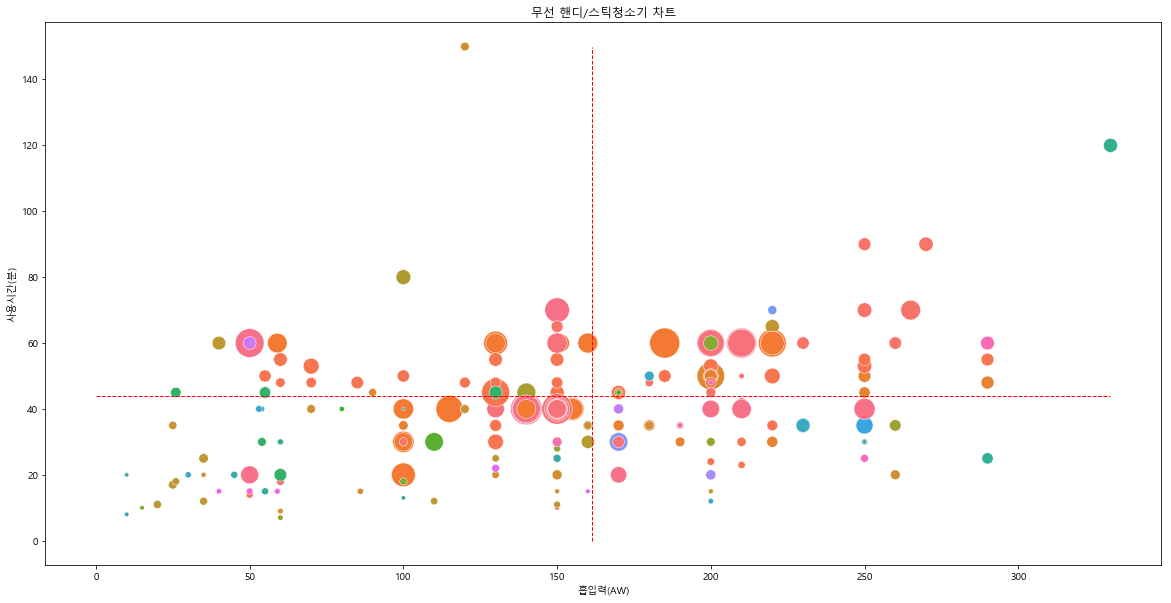

In [15]:
plt.figure(figsize = (20,10))
plt.title("무선 핸디/스틱청소기 차트")

sns.scatterplot(x = '흡입력(AW)', y = '사용시간(분)', size = '가격', hue = chart_data['회사명'], data = chart_data, sizes = (10,1000), legend = False)

plt.plot([0, suction_max_value],
        [use_time_mean_value, use_time_mean_value],
        'r--',
        lw = 1)
plt.plot([suction_mean_value, suction_mean_value],
        [0, use_time_max_value],
        'r--',
        lw = 1)
plt.show()

In [31]:
#상위 20개 제품(인기도순 정렬)

chart_data_selected = chart_data[:15]
len(chart_data_selected)

20

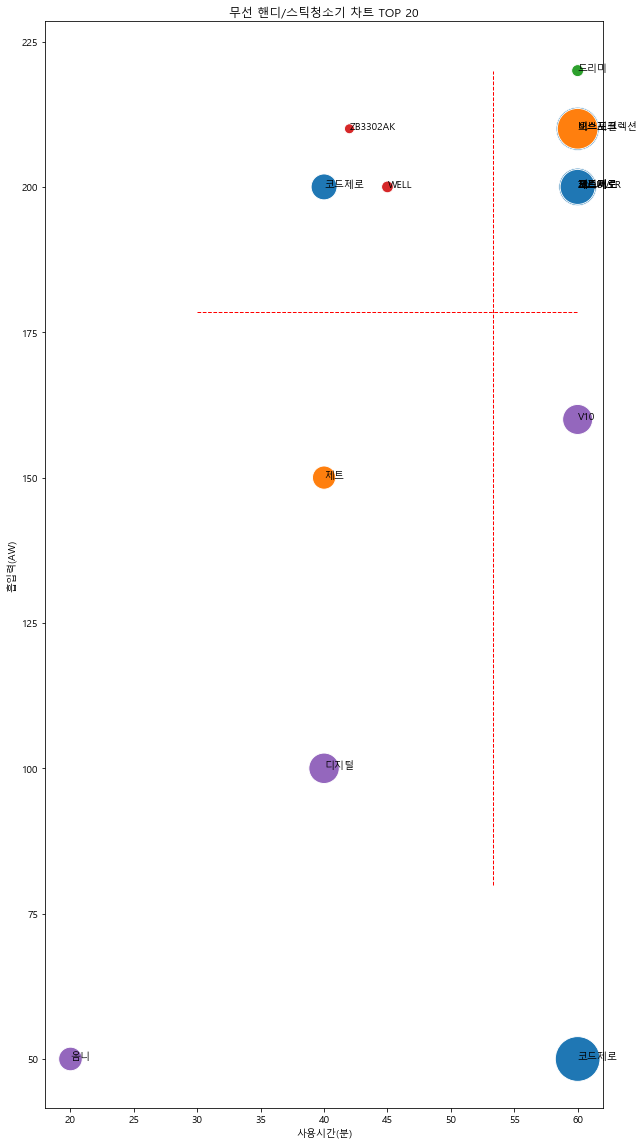

In [43]:
suction_max_value = chart_data_selected['흡입력(AW)'].max()
suction_mean_value = chart_data_selected['흡입력(AW)'].mean()
use_time_max_value = chart_data_selected['사용시간(분)'].max()
use_time_mean_value = chart_data_selected['사용시간(분)'].mean()

plt.figure(figsize=(10,20))
plt.title("무선 핸디/스틱청소기 차트 TOP 20")
sns.scatterplot(x = '사용시간(분)',
               y = '흡입력(AW)',
               size = '가격',
               hue = chart_data_selected['회사명'],
               data = chart_data_selected, sizes = (100, 2000),
               legend = False)

plt.plot([use_time_mean_value, use_time_mean_value],
         [80, suction_max_value],
        'r--',
        lw = 1)
plt.plot([30, use_time_max_value],
         [suction_mean_value, suction_mean_value],
        'r--',
        lw = 1)

for index, row in chart_data_selected.iterrows():
    x = row['사용시간(분)']
    y = row['흡입력(AW)']
    s = row['제품'].split(' ')[0]
    plt.text(x, y, s, size=10)


plt.show()